# Introduction to Regression with Neural Networks in Tensorflow

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf
if not os.path.exists("helper_functions.py"):
  !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
  print("[INFO] 'helper_functions.py' already exists, skipping download.")
from helper_functions import *
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')
importTensorflow(memory=4000, precision=True)

[INFO] 'helper_functions.py' already exists, skipping download.
2.13.0
1 Physical GPUs, 1 Logical GPUs
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6
<Policy "mixed_float16">


### Creating a data to view and fit

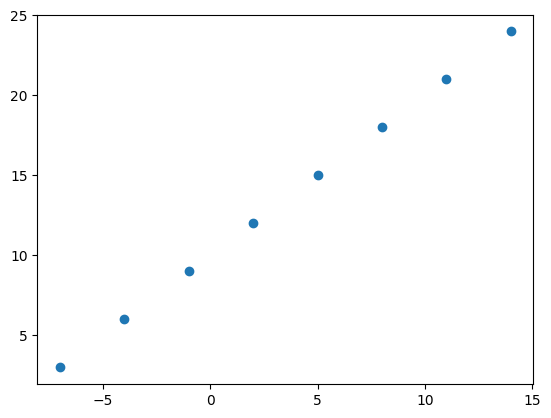

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
#Create labels
y=np.array([3.,6.,9.,12.,15.,18.,21.,24.])
#Visualize it
plt.scatter(X,y)

In [3]:
y == (X+10)

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Create a demo tensor for housing price prediction
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [6]:
# Turn our np array into tensor
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with Tensorflow

1. Creating a model - define input and output layers and hidden layers
2. Compile a model - define the loss function, the function which tells how good our model is and optimizer which tells our model to improve
3. Fitting a model - letting the model try to find patterns between X and y

In [7]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae","accuracy"]
              )
# 3. Fit the model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 375ms/step - loss: 8.0156 - mae: 8.0110 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 51ms/step - loss: 8.0156 - mae: 8.0110 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 7.8750 - mae: 7.8767 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 7.7461 - mae: 7.7439 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 7.6133 - mae: 7.6115 - accuracy: 0.0000e+00


In [8]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Improving the model

We can improve the model by altering the steps taken
1. Creating a model - increase the hidden layers and also change the activation function of each layer
2. Compiling a model - change optimization function and learning rate hyper-parameter
3. Fitting model - increase epochs or increase data

In [9]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae","accuracy"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 444ms/step - loss: 16.6250 - mae: 16.6285 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 16.6250 - mae: 16.6285 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 16.6250 - mae: 16.6285 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 16.3438 - mae: 16.3481 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 16.0625 - mae: 16.0662 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 15.7812 - mae: 15.7858 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 15.5000 - mae: 15.5032 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 15.2266 - mae: 15.2235 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 4ms/ste

In [10]:
model.predict([17.])

1/1 [==============================] - 0s 68ms/step


array([[29.66]], dtype=float16)

In [11]:
# teaking the model to improve
# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['mae',"accuracy"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 9.1094 - mae: 9.1104 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 128ms/step - loss: 9.1094 - mae: 9.1104 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0781 - mae: 9.0781 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0312 - mae: 9.0380 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0000 - mae: 8.9978 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9531 - mae: 8.9552 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9062 - mae: 8.9126 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.8750 - mae: 8.8694 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.828

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 42ms/step


array([[31.34]], dtype=float16)

In [13]:
# adding hidden layers this time
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['mae']
              )
model.fit(tf.expand_dims(X,axis=-1),y,epochs=150)

Epoch 1/150
1/1 [==============================] - 1s 760ms/step - loss: 14.5234 - mae: 14.5254
Epoch 2/150
1/1 [==============================] - 0s 5ms/step - loss: 13.8906 - mae: 13.8981
Epoch 3/150
1/1 [==============================] - 0s 4ms/step - loss: 13.2812 - mae: 13.2748
Epoch 4/150
1/1 [==============================] - 0s 5ms/step - loss: 12.6562 - mae: 12.6526
Epoch 5/150
1/1 [==============================] - 0s 5ms/step - loss: 12.0312 - mae: 12.0333
Epoch 6/150
1/1 [==============================] - 0s 5ms/step - loss: 11.4062 - mae: 11.4093
Epoch 7/150
1/1 [==============================] - 0s 5ms/step - loss: 10.7812 - mae: 10.7824
Epoch 8/150
1/1 [==============================] - 0s 5ms/step - loss: 10.1406 - mae: 10.1469
Epoch 9/150
1/1 [==============================] - 0s 5ms/step - loss: 9.5000 - mae: 9.4994
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 8.8359 - mae: 8.8365
Epoch 11/150
1/1 [==============================] - 0s 5ms/st

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 41ms/step


array([[27.77]], dtype=float16)

In [15]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
# Make labels for the data set
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

([<matplotlib.lines.Line2D at 0x7f42bb9b44c0>],
 <matplotlib.collections.PathCollection at 0x7f42a3f59e50>)

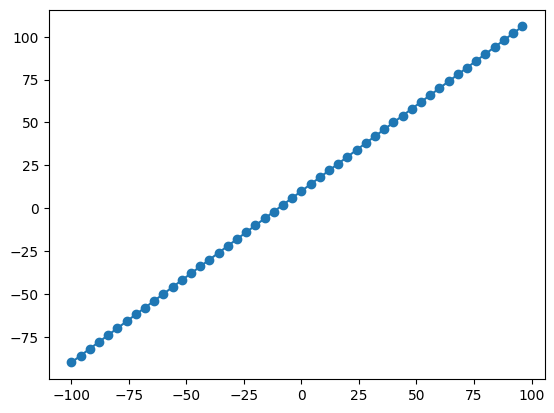

In [17]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y),plt.scatter(X,y)

### The 2-3 sets...

In [18]:
# Check the length of the sample we have
len(X)

50

In [19]:
# Split the data into train-test set
X_train = X[:40]
y_train=y[:40]
X_test = X[40:]
y_test = y[40:]
X_train,X_test,y_train,y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

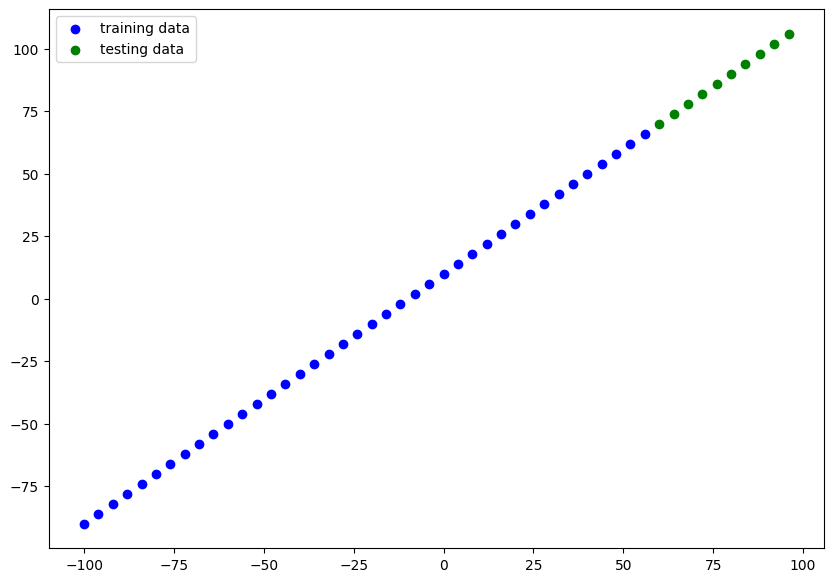

In [20]:
plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c='b',label='training data')

plt.scatter(X_test,y_test,c='g',label="testing data")

plt.legend()

In [21]:
# building a neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['mae']
              )
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=150)

Epoch 1/150
2/2 [==============================] - 1s 4ms/step - loss: 43.0187 - mae: 43.0050
Epoch 2/150
2/2 [==============================] - 1s 4ms/step - loss: 40.0719 - mae: 40.0550
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 28.2594 - mae: 28.2574
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 14.5953 - mae: 14.5884
Epoch 5/150
2/2 [==============================] - 0s 4ms/step - loss: 11.9969 - mae: 11.9923
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 9.0375 - mae: 9.0342
Epoch 7/150
2/2 [==============================] - 0s 4ms/step - loss: 5.4352 - mae: 5.4336
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 6.8000 - mae: 6.7977
Epoch 9/150
2/2 [==============================] - 0s 4ms/step - loss: 5.1281 - mae: 5.1278
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 6.0719 - mae: 6.0744
Epoch 11/150
2/2 [==============================] - 0s 4ms/step - los

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### model(x) gives a tensor object but model.predict(x) only gives numpy array

In [23]:
a = model.predict(X_test)
b = model(X_test)
b

1/1 [==============================] - 0s 42ms/step


<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
array([[ 84.1 ],
       [ 89.  ],
       [ 93.9 ],
       [ 98.75],
       [103.6 ],
       [108.5 ],
       [113.4 ],
       [118.25],
       [123.1 ],
       [128.1 ]], dtype=float16)>

In [24]:
model.evaluate(model(X_test),y_test)

1/1 [==============================] - 0s 95ms/step - loss: 51.8438 - mae: 51.8625


[51.84375, 51.86249923706055]

In [25]:
# Creating model that builds automatically
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are parameters(patterns) that the model can update
* Non-trainable paramas - these are not updated during training, happens when you bring already learnt from other models

In [27]:
# Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [28]:
model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


array([[ 78.25],
       [ 83.4 ],
       [ 88.44],
       [ 93.56],
       [ 98.7 ],
       [103.75],
       [108.8 ],
       [113.94],
       [119.06],
       [124.2 ]], dtype=float16)

In [29]:
tf.keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing model predictions

To visualize prediction, a good idea is to plot them against ground truth labels

In [30]:
y_pred=model.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 12ms/step


(array([[ 78.25],
        [ 83.4 ],
        [ 88.44],
        [ 93.56],
        [ 98.7 ],
        [103.75],
        [108.8 ],
        [113.94],
        [119.06],
        [124.2 ]], dtype=float16),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

1/1 [==============================] - 0s 11ms/step


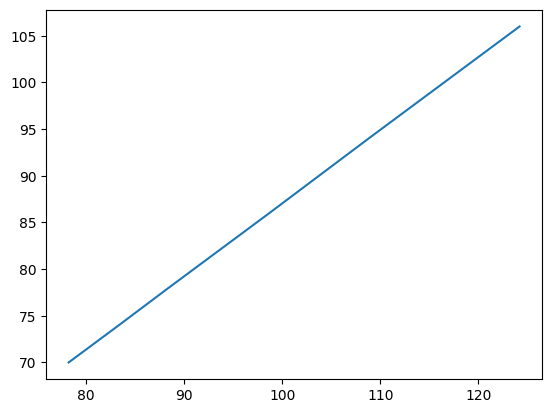

In [31]:
plt.plot(model.predict(X_test),y_test)

In [32]:
# Creating a plotting function:
def plot_prediction(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_label,c='b',label='training_data')
  #Plot testing data in green
  plt.scatter(test_data,test_label,c='g',label="testing_data")
  #Plot predictions
  plt.scatter(test_data,predictions,c='r',label="predictions")
  #legends
  plt.legend()

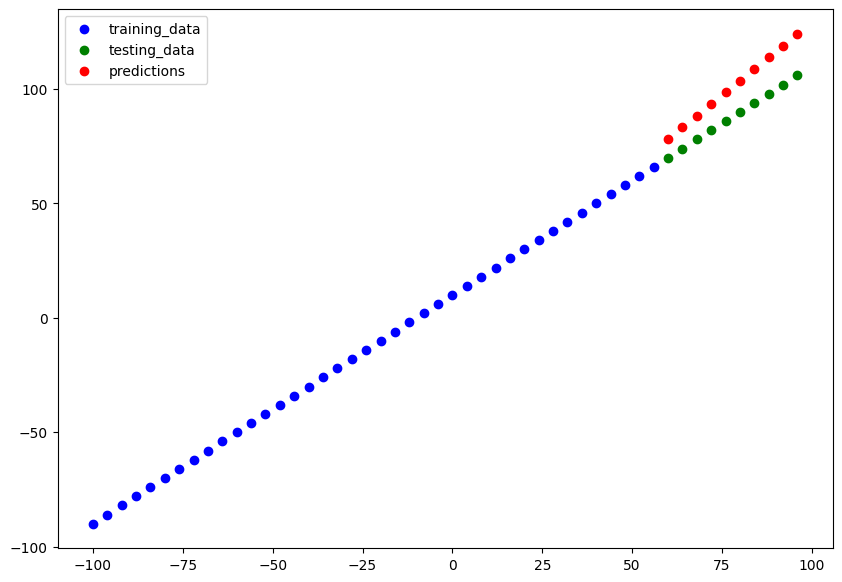

In [33]:
plot_prediction(X_train,y_train,X_test,y_test,y_pred)

### Evaluating models prediction with regression evaluation matrix

Two types:
1. MAE
2. MSE

In [34]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 62ms/step - loss: 13.2031 - mae: 13.2063


[13.203125, 13.206250190734863]

In [35]:
y_pred,y_test

(array([[ 78.25],
        [ 83.4 ],
        [ 88.44],
        [ 93.56],
        [ 98.7 ],
        [103.75],
        [108.8 ],
        [113.94],
        [119.06],
        [124.2 ]], dtype=float16),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [36]:
# Calculate MAE
y_pred=tf.squeeze(tf.constant(y_pred))
tf.metrics.mean_absolute_error(y_test,y_pred), tf.keras.losses.mae(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float16, numpy=13.2>,
 <tf.Tensor: shape=(), dtype=float16, numpy=13.2>)

In [37]:
# Calculate MSE
tf.metrics.mean_squared_error(y_test,y_pred), tf.keras.losses.mse(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float16, numpy=184.4>,
 <tf.Tensor: shape=(), dtype=float16, numpy=184.4>)

In [38]:
y_test,y_train

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [39]:
# Calculate Huber
h= tf.losses.Huber()
h(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=12.70625>

In [40]:
# make functions to reuse mae and mse
def mae_mse(y_test,y_pred):
  return tf.keras.losses.mae(y_test,y_pred).numpy(),tf.keras.losses.mse(y_test,y_pred).numpy()

In [41]:
mae_mse(y_test,y_pred)

(13.2, 184.4)

In [42]:
X=tf.reshape(tf.range(1,15626),shape=(125,125))
y=tf.reshape(tf.range(1,15626),shape=(125,125))
X,y

(<tf.Tensor: shape=(125, 125), dtype=int32, numpy=
 array([[    1,     2,     3, ...,   123,   124,   125],
        [  126,   127,   128, ...,   248,   249,   250],
        [  251,   252,   253, ...,   373,   374,   375],
        ...,
        [15251, 15252, 15253, ..., 15373, 15374, 15375],
        [15376, 15377, 15378, ..., 15498, 15499, 15500],
        [15501, 15502, 15503, ..., 15623, 15624, 15625]], dtype=int32)>,
 <tf.Tensor: shape=(125, 125), dtype=int32, numpy=
 array([[    1,     2,     3, ...,   123,   124,   125],
        [  126,   127,   128, ...,   248,   249,   250],
        [  251,   252,   253, ...,   373,   374,   375],
        ...,
        [15251, 15252, 15253, ..., 15373, 15374, 15375],
        [15376, 15377, 15378, ..., 15498, 15499, 15500],
        [15501, 15502, 15503, ..., 15623, 15624, 15625]], dtype=int32)>)

In [43]:
X_train=X[:100]
y_train=y[:100]
X_test=X[100:]
y_test=y[100:]

In [44]:
# Build a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,name="output_layer")
],name='model_2')
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [45]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 54ms/step


In [46]:
tf.squeeze(y_pred).shape,y_test.shape

(TensorShape([25, 125]), TensorShape([25, 125]))

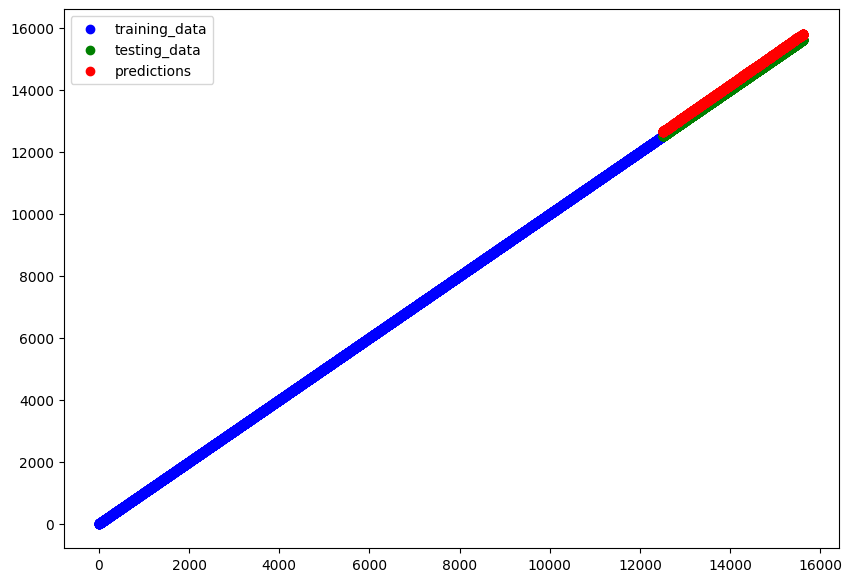

In [47]:
plot_prediction(X_train,y_train,X_test,y_test,y_pred)

In [48]:
(y_test).shape,tf.squeeze(y_pred).shape

(TensorShape([25, 125]), TensorShape([25, 125]))

In [49]:
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(25, 125), dtype=float16, numpy=
array([[12648., 12648., 12648., ..., 12768., 12768., 12768.],
       [12768., 12768., 12768., ..., 12896., 12896., 12896.],
       [12896., 12896., 12896., ..., 13024., 13024., 13024.],
       ...,
       [15424., 15424., 15432., ..., 15552., 15552., 15552.],
       [15552., 15552., 15552., ..., 15672., 15672., 15680.],
       [15680., 15680., 15680., ..., 15808., 15808., 15808.]],
      dtype=float16)>

In [50]:
y_test

<tf.Tensor: shape=(25, 125), dtype=int32, numpy=
array([[12501, 12502, 12503, ..., 12623, 12624, 12625],
       [12626, 12627, 12628, ..., 12748, 12749, 12750],
       [12751, 12752, 12753, ..., 12873, 12874, 12875],
       ...,
       [15251, 15252, 15253, ..., 15373, 15374, 15375],
       [15376, 15377, 15378, ..., 15498, 15499, 15500],
       [15501, 15502, 15503, ..., 15623, 15624, 15625]], dtype=int32)>

In [51]:
y_pred=tf.reshape(y_pred,shape=(3125,))
y_test=tf.reshape(y_test,shape=(3125,))
y_pred,y_test

(<tf.Tensor: shape=(3125,), dtype=float16, numpy=array([12648., 12648., 12648., ..., 15808., 15808., 15808.], dtype=float16)>,
 <tf.Tensor: shape=(3125,), dtype=int32, numpy=array([12501, 12502, 12503, ..., 15623, 15624, 15625], dtype=int32)>)

In [52]:
tf.keras.losses.mae(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float16, numpy=162.1>

In [53]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 125, 100)          200       
                                                                 
 output_layer (Dense)        (None, 125, 1)            101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Saving the models

Saving our models allows us to use them outside of google colab

In [54]:
# save model by .save
model.save("best_model_savedModel_format")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427016ad00>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427016ad00>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4280042e80>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4280042e80>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42700f9eb0>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42700f9eb0>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427010df40>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427010df40>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4270047220>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4270047220>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427005a370>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427005a370>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687bf340>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687bf340>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687d3340>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687d3340>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427016ad00>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427016ad00>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4280042e80>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4280042e80>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42700f9eb0>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42700f9eb0>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427010df40>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427010df40>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4270047220>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f4270047220>, 139923592316208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427005a370>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f427005a370>, 139923592316688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687bf340>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687bf340>, 139923592513616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687d3340>, 139923592514016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f42687d3340>, 139923592514016), {}).


INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


In [55]:
# save model using HDF5 format
model.save("best_model_HDF5_Foramt.h5")

/home/ujjwal/miniconda3/envs/tf2.13/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Larger Example

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [59]:
X = df_one_hot.drop("charges",axis=1)
y = df_one_hot["charges"]
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0        True     False      False        True   
 1      18  33.770         1       False      True       True       False   
 2      28  33.000         3       False      True       True       False   
 3      33  22.705         0       False      True       True       False   
 4      32  28.880         0       False      True       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3       False      True       True       False   
 1334   18  31.920         0        True     False       True       False   
 1335   18  36.850         0        True     False       True       False   
 1336   21  25.800         0        True     False       True       False   
 1337   61  29.070         0        True     False      False        True   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [60]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [61]:
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)

In [62]:
# Cuild a neural network
tf.random.set_seed(42)

df_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
df_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(0.01),metrics=['mae'])
df_model.fit(tf.constant(X_train, dtype=tf.float32),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: inf - mae: 13336.5703
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 13263.4131
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 13118.3408
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 12864.6855
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 12438.8389
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 11836.0225
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 11120.2217
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 10329.8262
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 9566.3164
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 8860.8125
Epoch 11/100
34/34 [==============================]

In [63]:
# Check the results with y_test
y_pred=df_model.predict(X_test)
df_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: inf - mae: 6163.1362


[inf, 6163.13623046875]

In [64]:
# Improving the model:
df_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dense(1)
])
df_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=['mae']
)
df_model_2.fit(X_test,y_test,epochs=170)

Epoch 1/170
9/9 [==============================] - 1s 64ms/step - loss: inf - mae: 12693.1719
Epoch 2/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 8290.0518
Epoch 3/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 6897.1455
Epoch 4/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 6758.6978
Epoch 5/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 6978.9868
Epoch 6/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 7365.6006
Epoch 7/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 6113.0708
Epoch 8/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 5115.7539
Epoch 9/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 4237.2500
Epoch 10/170
9/9 [==============================] - 0s 2ms/step - loss: inf - mae: 4481.2129
Epoch 11/170
9/9 [==============================] - 0s 2ms/step - loss: inf -

In [65]:
df_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: inf - mae: 2320.0261  


[inf, 2320.026123046875]

In [66]:
tf.random.set_seed(42)
df_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1),
])
df_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=["mae"]
)
history = df_model_3.fit(X_train,y_train,epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 19ms/step - loss: inf - mae: 10222.5107
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 7155.5635
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 5013.2222
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 6339.1831
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 4153.9512
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 4654.5195
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 3451.7239
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 3343.9412
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 3143.6995
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 3309.5906 
Epoch 11/150
34/34 [==============================] - 0s

In [67]:
df_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: inf - mae: 2427.9441


[inf, 2427.944091796875]

Text(0.5, 0, 'epochs')

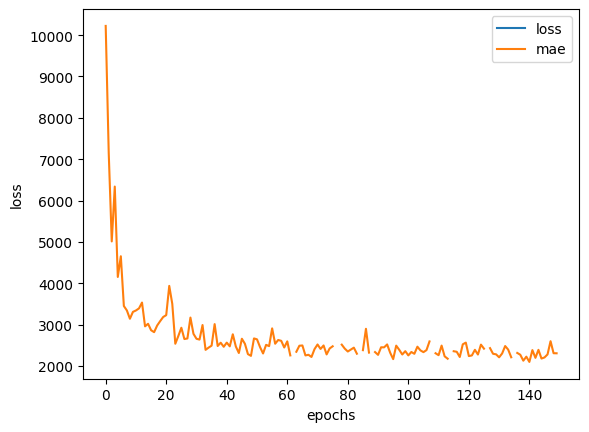

In [68]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalizarion and standardization)

In [69]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"])
)

# Create X and y values
X = df.drop("charges",axis=1)
y=df["charges"]

# Build train,test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [72]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [73]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [74]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [75]:
# Build a neural network model
tf.random.set_seed(42)
df_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
df_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(0.01),
                 metrics=['mae']
                 )
df_model.fit(X_train_normal,y_train,epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 2ms/step - loss: inf - mae: 13148.9492
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 9654.6895
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 7680.1860
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 6744.1450
Epoch 5/150
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 5326.0288
Epoch 6/150
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 3993.4270
Epoch 7/150
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 3601.4617
Epoch 8/150
34/34 [==============================] - 0s 1ms/step - loss: inf - mae: 3478.9570
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 3354.4089
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: inf - mae: 3312.3896 
Epoch 11/150
34/34 [==============================] - 0s 

In [76]:
df_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: inf - mae: 1753.1680  


[inf, 1753.16796875]

# EXERCISES

In [77]:
from sklearn.model_selection import train_test_split
import numpy as np

In [78]:
# 1. Create your own regression dataset and build fot a model to it
X = tf.constant(np.array([-7,-4,-1,2,5,8]),dtype=tf.int32)
y = tf.constant(np.array([100,200,300,400,500,600]),dtype=tf.int32)

X_train = X[:4]
X_test = X[4:]
y_train = y[:4]
y_test = y[4:]

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['mae']
                )

history=model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 645ms/step - loss: 249.7500 - mae: 249.6554
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 249.1250 - mae: 249.1836
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 248.7500 - mae: 248.7106
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 248.2500 - mae: 248.2355
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 247.7500 - mae: 247.7561
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 247.2500 - mae: 247.2677
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 246.7500 - mae: 246.7686
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 246.2500 - mae: 246.2502
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 245.7500 - mae: 245.7119
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 245.1250 - mae: 245.1455
Epoch 11/100
1/1 [===================

In [79]:
y_pred = model_1.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 33ms/step


(array([[486.2],
        [733. ]], dtype=float16),
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([500, 600], dtype=int32)>)

In [80]:
# 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset,how does it perform
X_train, X_test, y_train, y_test = train_test_split(X.numpy(),y.numpy(),test_size=.2,random_state=42)
tf.random.set_seed(42)
model_1_new = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1_new.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['mae']
                )

history1=model_1_new.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 450.0000 - mae: 449.8577
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 447.5000 - mae: 447.3879
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 444.0000 - mae: 444.1958
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 439.5000 - mae: 439.4976
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 439.5000 - mae: 439.4976
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 433.0000 - mae: 432.8882
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 433.0000 - mae: 432.8882
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 423.5000 - mae: 423.5635
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 410.2500 - mae: 410.3438
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 410.2500 - mae: 410.3438
Epoch 11/100
1/1 [======================

In [81]:
y_pred = model_1_new.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 43ms/step


(array([[487.5],
        [348.5]], dtype=float16),
 array([100, 200], dtype=int32))

(<Axes: >, <Axes: >)

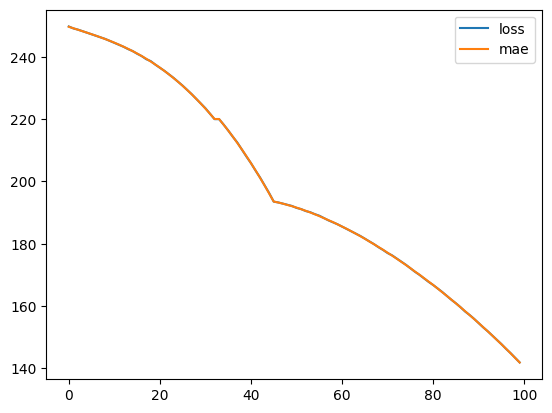

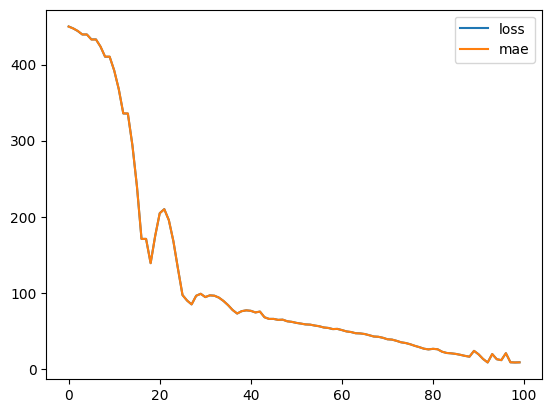

In [82]:
pd.DataFrame(history.history).plot(),pd.DataFrame(history1.history).plot() 

In [83]:
# 3. Try and improve insurance dataset
df_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1200      
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11401 (44.54 KB)
Trainable params: 11401 (44.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# 4. Import the Boston pricing dataset from Tensorflow tf.keras.datasets and model it
from sklearn.datasets import load_boston
load = load_boston()
df = pd.DataFrame(load.data,columns=load.feature_names)

/home/ujjwal/miniconda3/envs/tf2.13/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [85]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [86]:
df,df.describe()

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [87]:
X = df.drop("TAX",axis=1)
y = df["TAX"]
X,y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  PTRATIO  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0     15.3   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0     17.8   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0     17.8   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0     18.7   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0     18.7   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0     21.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0     21.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0     21.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0     21.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0     21.0   
 
           B  LSTAT  
 0    396.90   4.98  
 1    396.90   9.1

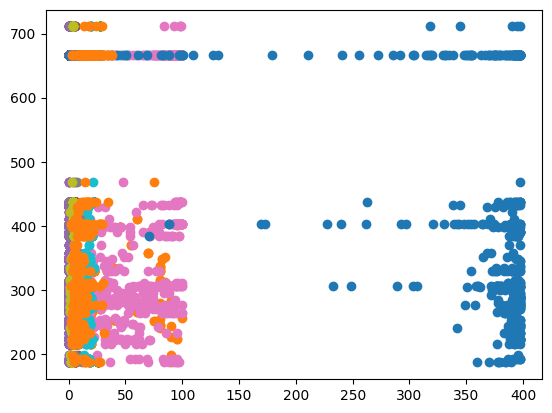

In [88]:
for i in X:
  plt.scatter(df[i],y)

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,y_train

(         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD  PTRATIO  \
 477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0     20.2   
 15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0     21.0   
 332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0     16.9   
 423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0     20.2   
 19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0     21.0   
 ..        ...   ...    ...   ...     ...    ...   ...     ...   ...      ...   
 106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110   5.0     20.9   
 270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290   3.0     18.6   
 348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0     17.0   
 435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0     20.2   
 102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0     20.9   
 
           B  LSTAT  
 477

In [90]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (MinMaxScaler(),X.columns)
)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [92]:
model_boston = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_boston.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.01),
                     metrics=['mae']
                     )
history_boston = model_boston.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 394.8342 - mae: 394.8281
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 268.6213 - mae: 268.6310
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 168.6658 - mae: 168.6795
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 148.1077 - mae: 148.0920
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 133.7760 - mae: 133.7886
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 133.2865 - mae: 133.3106
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 130.2191 - mae: 130.1979
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 129.4010 - mae: 129.3951
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 131.3973 - mae: 131.3955
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 131.5291 - mae: 131.5156
Epoch 11/100
13/13 

In [93]:
model_boston.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 147.8603 - mae: 147.8370


[147.86029052734375, 147.83700561523438]

<Axes: >

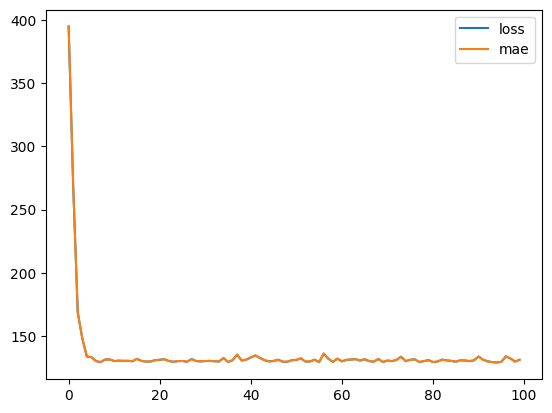

In [94]:
pd.DataFrame(history_boston.history).plot()